# Comparing attractors

This notebook shows how to generate time series embeddings using a variety of techniques

### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import from local directory
import sys
sys.path.insert(0, './fnn')

from chaos_models import *
from utils import *
from models import *

import tensorflow as tf
print(tf.__version__) # 2.0 or greater

%matplotlib inline
%load_ext autoreload
%autoreload 2

2.4.0-dev20200727


### Generate example dataset

In [2]:
n_features = 1
NUM_HIDDEN = 10
TIME_WINDOW = 10
SAMPLE_WINDOW = 5000

eq = Lorenz()
ic = (-8.60632853, -14.85273055,  15.53352487)# pick points close to the attractor
sol = eq.integrate(ic, np.linspace(0, 500, 125000))
sol = sol[:, ::10]

# split train and separately normalize train and test
X_train, X_test = train_test(sol[0], SAMPLE_WINDOW, TIME_WINDOW)  


### Create embeddings using a variety of different models

In [3]:
# LSTM
enc_lstm, dec = train_autoencoder(X_train, network_type='lstm', lambda_latent=4e-2, learning_rate=1e-3)
coords_lstm = enc_lstm.predict(X_test)[TIME_WINDOW:]
print("LSTM complete")

# MLP
enc_mlp, dec = train_autoencoder(X_train, network_type='mlp', lambda_latent=1e-2, learning_rate=2e-4)
coords_mlp = enc_mlp.predict(X_test)[TIME_WINDOW:]
print("MLP complete")

# ICA
enc_ica = train_ica(X_train, num_hidden=NUM_HIDDEN)
coords_ica = enc_ica(X_test)[TIME_WINDOW:]
print("ICA complete")

# tICA
enc_tica = train_tica(X_train, num_hidden=NUM_HIDDEN)
coords_tica = enc_tica(X_test)[TIME_WINDOW:]
print("tICA complete")

# EigenDelay
enc_etd = train_etd(X_train, num_hidden=NUM_HIDDEN)
coords_etd = enc_etd(X_test)[TIME_WINDOW:]
print("ETD complete")


LSTM complete
MLP complete
ICA complete
tICA complete
ETD complete


### Visualize different embedding methods

<Figure size 432x288 with 0 Axes>

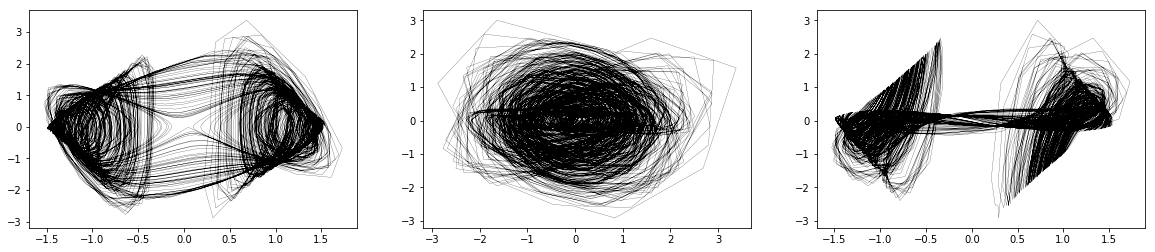

<Figure size 432x288 with 0 Axes>

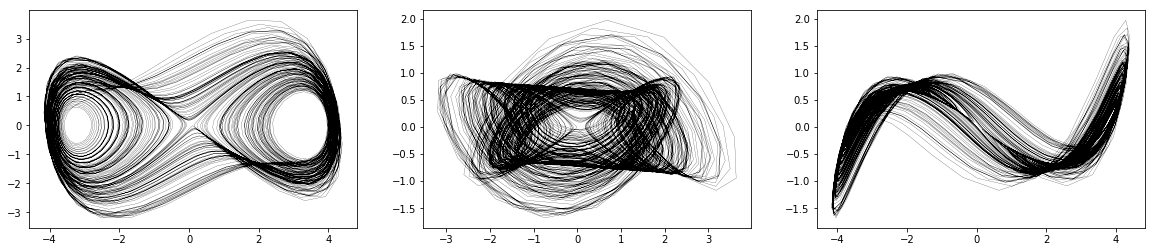

<Figure size 432x288 with 0 Axes>

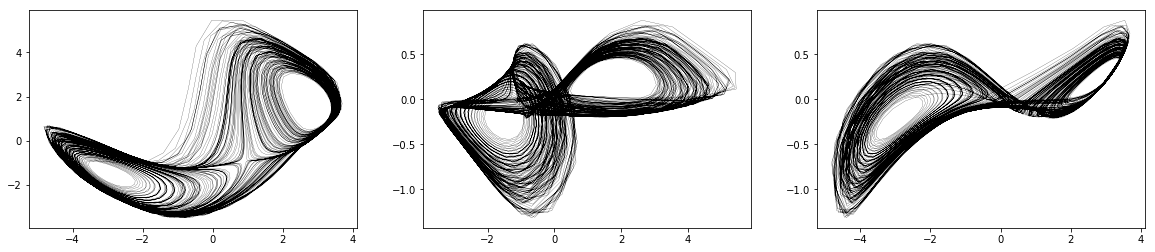

<Figure size 432x288 with 0 Axes>

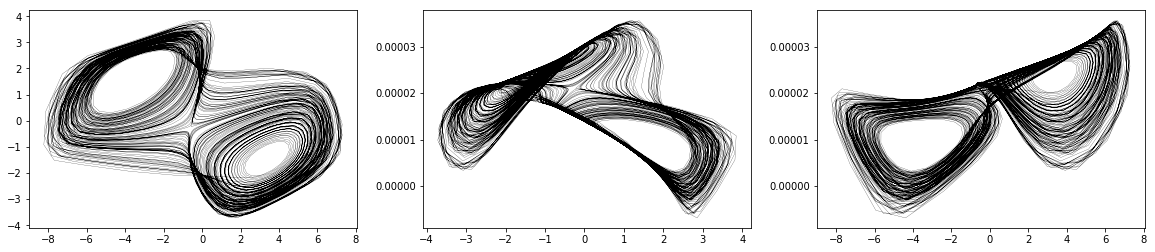

In [9]:
plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_tica[:,0], coords_tica[:,1], 'k', linewidth=.2)
ax[1].plot(coords_tica[:,1], coords_tica[:,2], 'k', linewidth=.2)
ax[2].plot(coords_tica[:,0], coords_tica[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_etd[:,0], coords_etd[:,1], 'k', linewidth=.2)
ax[1].plot(coords_etd[:,1], coords_etd[:,2], 'k', linewidth=.2)
ax[2].plot(coords_etd[:,0], coords_etd[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_mlp[:,0], coords_mlp[:,1], 'k', linewidth=.2)
ax[1].plot(coords_mlp[:,1], coords_mlp[:,2], 'k', linewidth=.2)
ax[2].plot(coords_mlp[:,0], coords_mlp[:,2], 'k', linewidth=.2)

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax[0].plot(coords_lstm[:,0], coords_lstm[:,1], 'k', linewidth=.2)
ax[1].plot(coords_lstm[:,1], coords_lstm[:,2], 'k', linewidth=.2)
ax[2].plot(coords_lstm[:,0], coords_lstm[:,2], 'k', linewidth=.2)